# Lab 8 Tasks

**Task 1**

In [1]:
import pandas as pd

df = pd.read_csv("iris.csv")
print(df.shape)
print(df.head(5))

(150, 5)
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Preprocessing of the iris data**

In [2]:
print(df.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


**Check for duplicates**

In [3]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (3, 5)


**Drop the duplicates**

In [4]:
df = df.drop_duplicates()
df.count()

sepal length    147
sepal width     147
petal length    147
petal width     147
class           147
dtype: int64

**Count the number of nulls in each column**

In [5]:
print(df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


**Print a summary statistics on the attributes**

In [6]:
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


**Plot histograms of numeric variables**

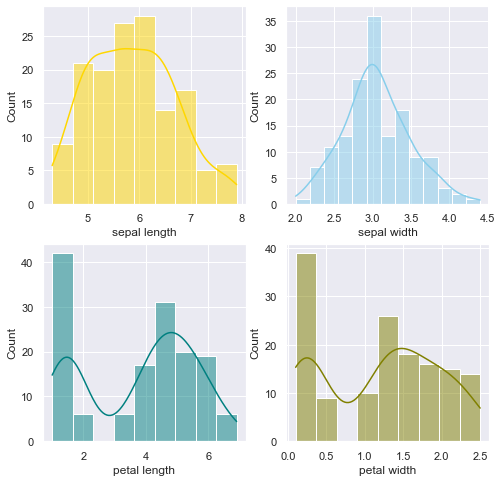

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig, axs=plt.subplots(2,2, figsize=(8,8))

#plot the histograms
sns.histplot(data=df, x="sepal length", kde=True, color="gold", ax=axs[0,0])
sns.histplot(data=df, x="sepal width", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data=df, x="petal length", kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=df, x="petal width", kde=True, color="olive", ax=axs[1,1])

plt.show()

**4 - Specify the input variables and the target variable**

In [10]:
X = df.drop(['class'], axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y = df['class'].values
print(Y[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


**Split the dataset into two pieces: training set and testing set, using the    
‘train_test_split’ function from sklearn. The testing data will be used to check the    
accuracy of the kNN model.**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_Vali_test, Y_train, y_Vali_test = train_test_split(X, Y,
                                    test_size=0.2, random_state=1, stratify=Y)

In [14]:
print(X_train.shape)

(117, 4)


**Because the “test_size” in ‘train_test_split’ is set as 0.2, which means 20% of the    
data is used as testing data, and the other 80% is training data. There are 147 rows    
in the iris dataset, so you should see the size of the input training set as: (117,4)**

_______________________________________________________

**Build the kNN classifier    
We will create a new k-NN classifier and set ‘n_neighbors’ as ‘3’, which means a    
new data point is labelled with by majority from the 3 nearest points.    
Next we will use the ‘fit’ function and pass in our training data as parameters to fit the    
kNN model to the training data.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

**Testing the model    
Once the model is trained, we can use the ‘predict’ function on our model to make    
predictions on our testing data. To save space, we will only show the first 5    
predictions of our testing set.**    

In [35]:
print(knn.predict(X_Vali_test)[0:5])

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


**Now let’s see how accurate our model is on the full testing set. To do this, we will use    
the ‘score’ function and pass in the testing input and target data to see how well our    
model predictions match up to the actual results**

In [39]:
print('Accuracy :', knn.score(X_Vali_test, y_Vali_test))

Accuracy : 0.9666666666666667


**Tune the model    
In general, the accuracy rises as the model complexity increases. For kNN the model    
complexity is determined by the value of K. Larger K value leads to smoother    
decision boundary (less complex model). Smaller K leads to more complex model    
(may lead to overfitting). Accuracy penalizes models that are too complex (over    
fitting) or not complex enough (underfit).**
    
**Change the value of K, i.e., the value of ‘n_neighbours’ in step 5, for example, set k    
as 2, 10, 20, etc. Check how the accuracy changes accordingly.    
You can also change the distance metric and observe how this will affect the    
accuracy.**